In [82]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## 간단한 전처리

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [84]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 선형분류기의 분류 결과 시각화를 위한 코드

In [85]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

## 분류 vs 회귀

#### 분류 : 데이터 값들을 기반으로 범주화(categorization)
ex. 주식 데이터 기반으로 "주가 상승", "주가 하락", "유지" 중 예측

#### 회귀 : 연속적인 데이터 값 자체를 예측
ex. 주식 데이터 기반으로 "주가"를 예측

2주차 수업에서는 머신러닝을 통한 분류에 대해 설명할것이다.


선형적으로 분류되는 데이터와 그렇지 않은 데이터는 각자 다름 분류 알고리즘을 요구한다. 기본적인 머신러닝 알고리즘 (퍼셉트론, 아달린, 로지스틱)은 사실 활성화 함수의 차이고 기본적인 알고리즘은 같음으로 
이들에 대해 먼저 소개하겠다!

## 선형 vs 비선형

사실 데이터셋의 구조에 따라서 분류기의 성능이 많이 차이난다.
또한 모든 데이터셋에 대해서 늘 최적의 성능을 보여주는 모델은 없다!

책에서는 공짜 점심없음 이론이라고 설명한다.
한마디로 날로먹을수 있는 공짜밥은 없다는것이다..

데이터셋이 선형적인 구조면 사실 많은 분류 알고리즘을 적용할수 있다. 하지만 문제는 우리는 어떤데이터가 선형적인 관계인지 모른다는 것이다.

사이킷런과 pandas, matplot, seaborn의 등의 라이브러리 함수를 이용해서 데이터가 선형적인지, 비선형적인지 관측해보자.

그 과정은 아래와 같다
1. 상관관계 행렬을 시각화, 정렬해서 상관계수가 높은 데이터를 뽑는다.
2. 목표 레이블과의 다른 데이터셋들의 관계를 시각화한다.
3. 시각화된 그림중 선형적으로 구분이 되는 데이터를 육안으로 판별한다.


In [86]:
import pandas as pd

print(iris.target_names)
print(iris.feature_names)
colnames = iris.feature_names

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [87]:
df_iris = pd.DataFrame(data=iris.data, columns=colnames)
df_iris["Target"] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [88]:
iris_corr = df_iris.corr()
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [89]:
iris_corr["Target"].sort_values

<bound method Series.sort_values of sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
Target               1.000000
Name: Target, dtype: float64>

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='Target', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='Target', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='

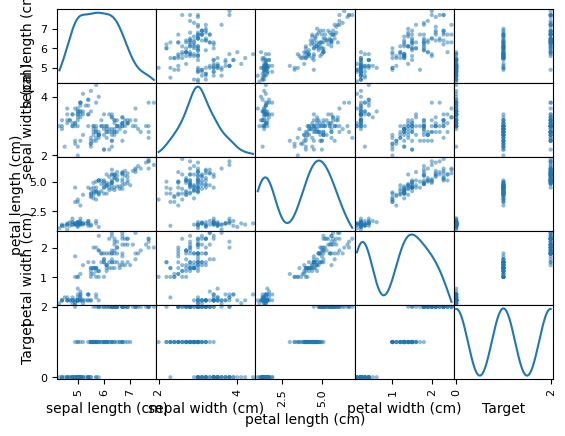

In [90]:
from pandas.plotting import scatter_matrix
import scipy

chosen_features = colnames
scatter_matrix(df_iris)

### 분석결과
target은 아무래도 범주가 3개이다 보니, 어떤 데이터셋과도 선형적인 관계는 힘들것이다. 하지만 petal length, petal width와 같은 데이터들은 선형적인 관계가 있다 할수있따.

In [91]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
# 'petal length (cm)', 'petal width (cm)'
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [93]:
from IPython.display import Image
%matplotlib inline

# 본격적인 분류 알고리즘 공부!! 퍼셉트론 밑바닥 구현 뜯어보기

In [94]:
import numpy as np

class Perceptron(object):

    """
    매개변수
        eta: float
            0.0 ~ 0.1 사이의 학습률
        n_iter: int 
            훈련 데이터셋 반복횟수
        random_stata : int
            가중치 무작위 초기화를 위한 난수 생성 시드번호

    속성
        w_ : 1차원 배열
            학습된 가중치
        errors_ : list
            에포크마다 누적된 오류 분포
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
    # param 
    # X : shape(n_samples, n_features)
    #   n개의 샘플과 n개의 특성으로 이뤄진 훈련 데이터
    # y : shape(1, n_samples) 
    #   타깃

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # numpy의 randomstate 객체를 반환한다. 이를 이용하면 일관된 난수 시퀸스를 생성하게 된다.
        # 첫번째 원소는 편향값이다. 이 가중치들을 0으로 초기화 하게되면 가중치 벡터의 방향에는 영향을 주지못하고, 크기에만 영향을 미친다.
        self.errors_ = []

        for _ in range(self.n_iter): 
            errors = 0
            for xi, target in zip(X, y): ## xi는 배열형태의 자료, target은 값일것이다.
                update = self.eta * (target - self.predict(xi)) 
                self.w_[1:] += update * xi # 두번째 인자부터는 일반적인 가중치이다. 이는 데이터의 입력에 따라 업데이트 돼야한다.
                self.w_[0] += update # w[0] 는 편향에 해당되는 가중치이다. 이는 xi 특성 (데이터의 입력)과 무관하게 업데이트 돼야한다. 
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    


    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # 배열 X, W[1:]의 내적계산 후 편향값 더하기
    

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) # 위의 인풋값에 대한 출력값을 매개로 해서, 만약 값이 0보다 크다면 1, 아니면 -1 출력

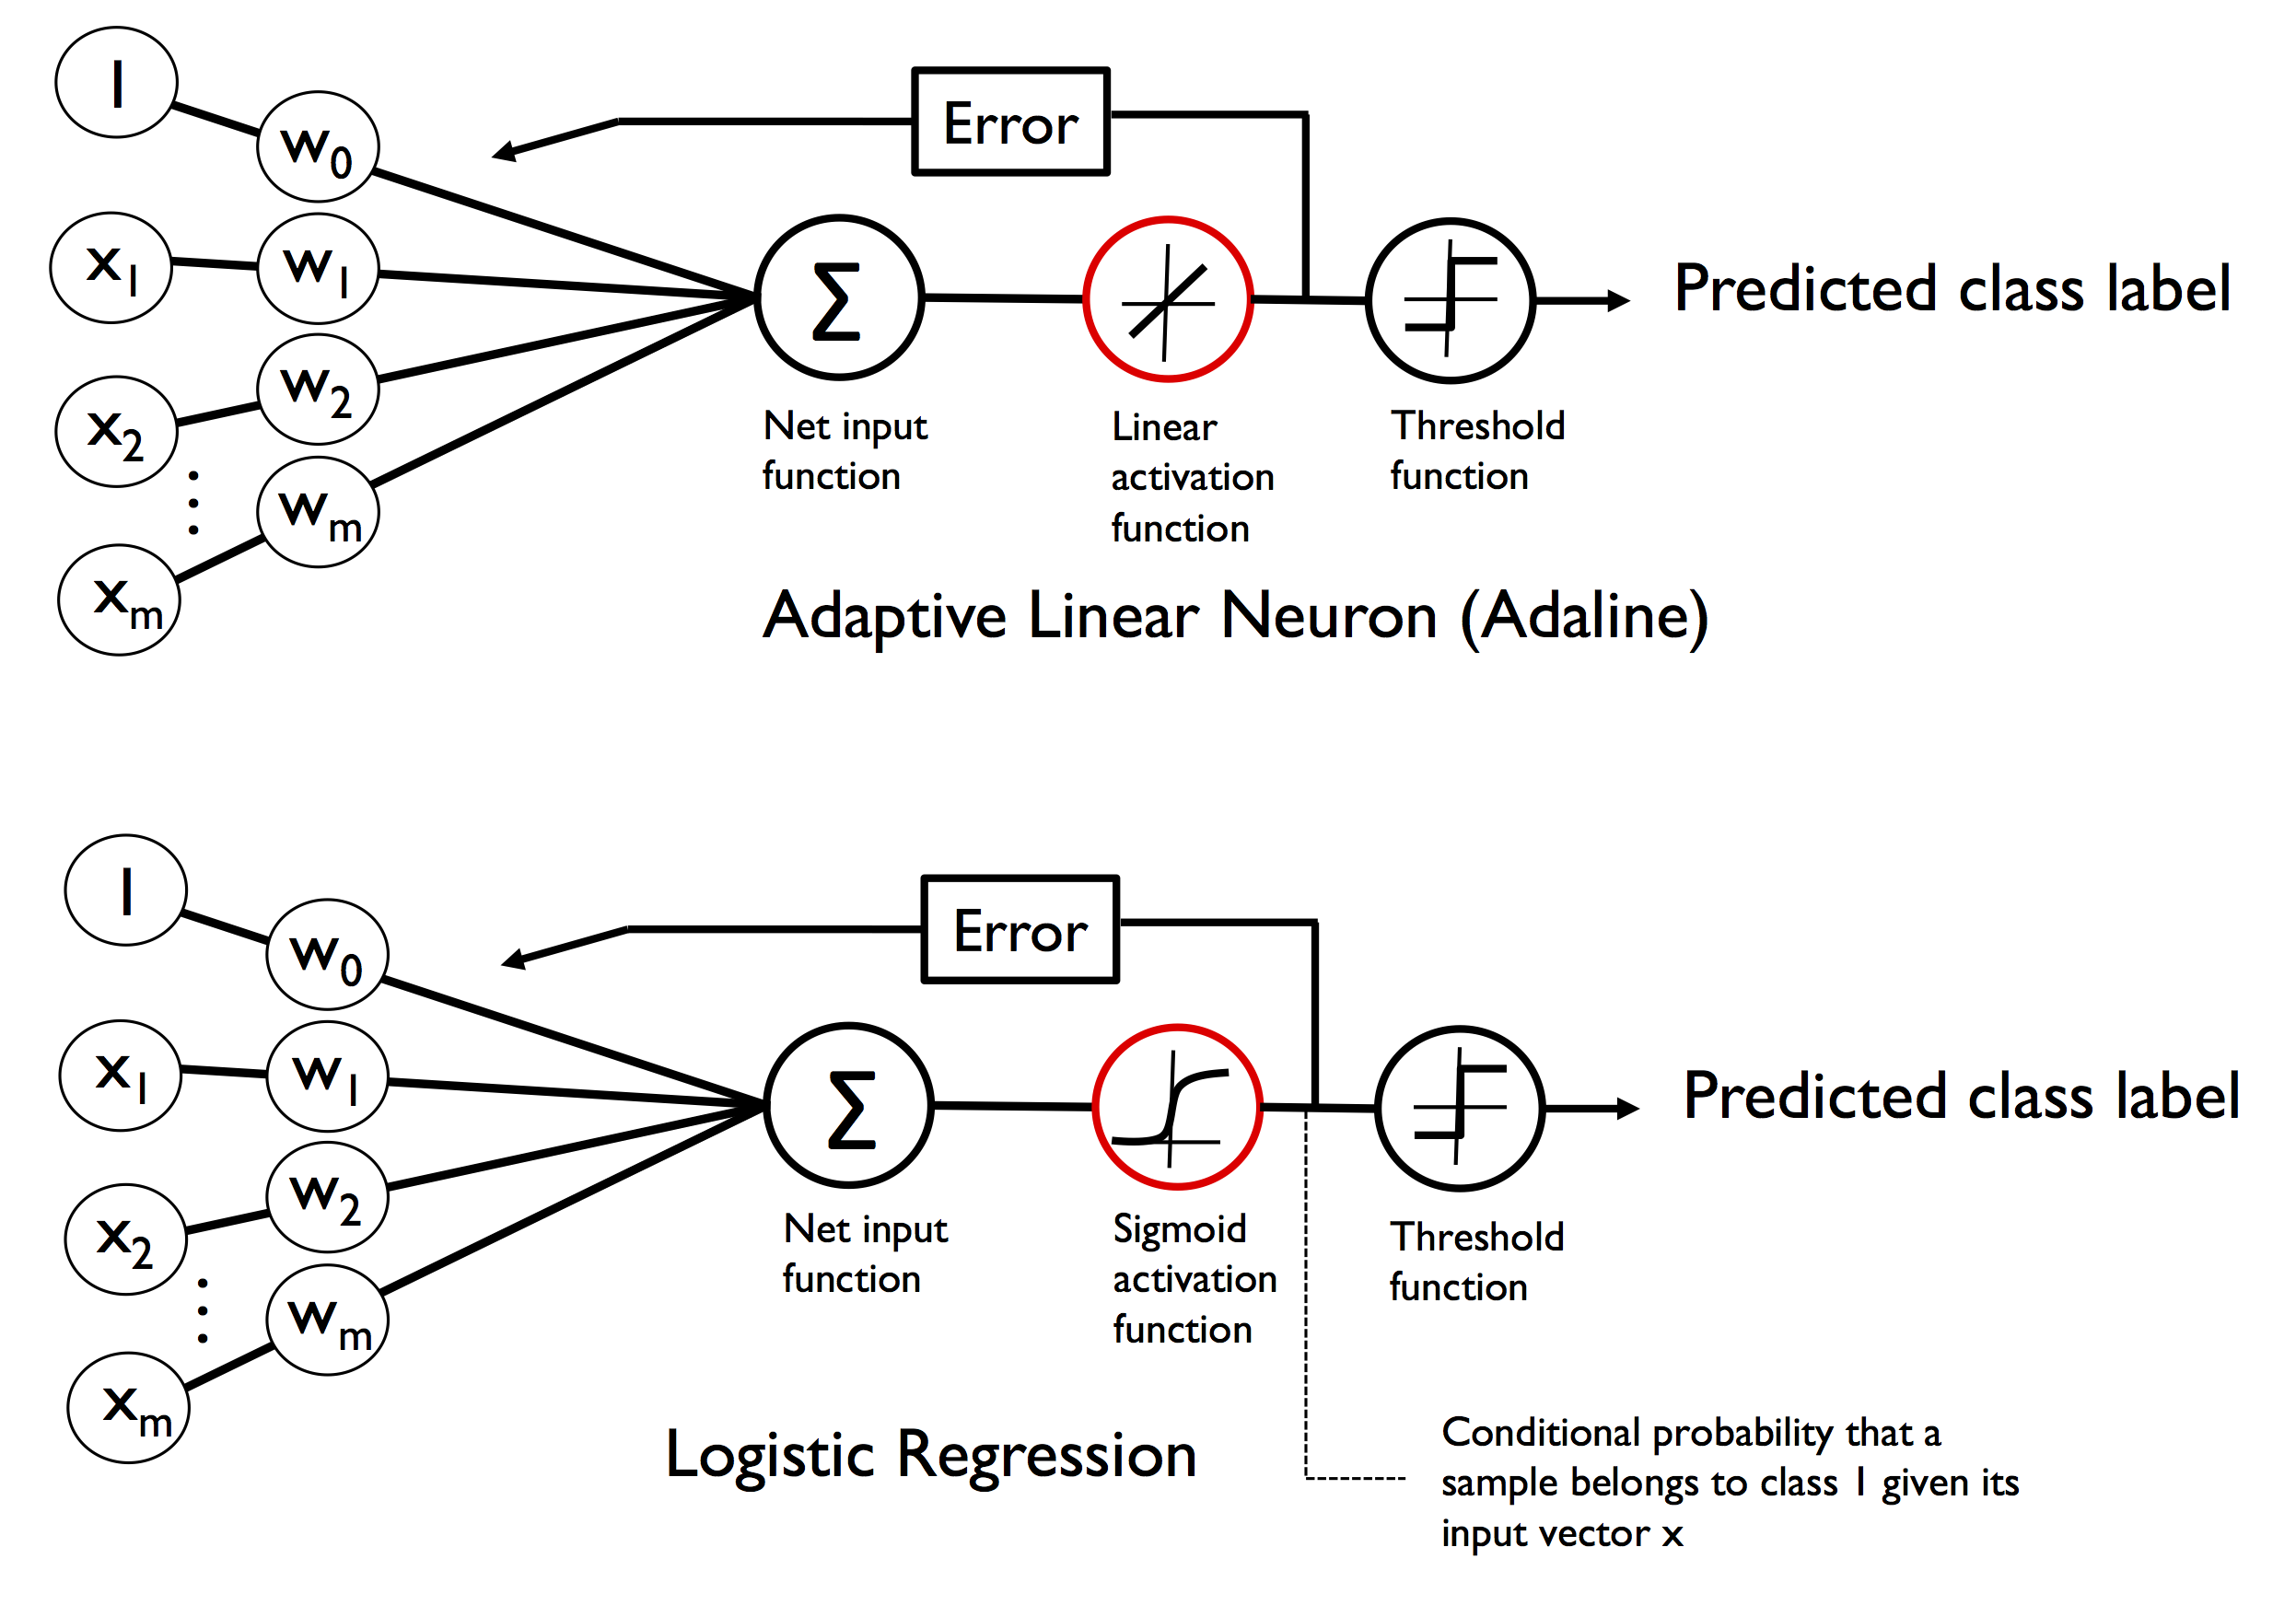

In [95]:
Image(filename='images/03_03.png', width=500) 

In [96]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


class AdalineGD(object):

    """
    선형 뉴런 분석기

    매개변수
        eta: float
            0.0 ~ 0.1 사이의 학습률
        n_iter: int 
            훈련 데이터셋 반복횟수
        random_stata : int
            가중치 무작위 초기화를 위한 난수 생성 시드번호

    속성
        w_ : 1차원 배열
            학습된 가중치
        cost : list
            데이터셋 마다의 비용 제곱합
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
    # param 
    # X : shape(n_samples, n_features)
    #   n개의 샘플과 n개의 특성으로 이뤄진 훈련 데이터
    # y : shape(1, n_samples) 
    #   타깃

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # numpy의 randomstate 객체를 반환한다. 이를 이용하면 일관된 난수 시퀸스를 생성하게 된다.
        # 첫번째 원소는 편향값이다. 이 가중치들을 0으로 초기화 하게되면 가중치 벡터의 방향에는 영향을 주지못하고, 크기에만 영향을 미친다.
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0 ## 목표가 되는 손실함수의 첫 정의! 
            self.cost_.append(cost)
        return self
    
    # !!! y = x 꼴의 간단한 선형 활성화 함수 !!! 이 환성화 함수의 유무가 아주아주 중요하다
    def activation(self, X):
        return X

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # 배열 X, W[1:]의 내적계산 후 편향값 더하기
    

    def predict(self, X):
        # 단위 계단함수를 사용하여 클래쓰 레이블은 만든다.
        return np.where(self.net_input(X) >= 0.0, 1, -1) # 위의 인풋값에 대한 출력값을 매개로 해서, 만약 값이 0보다 크다면 1, 아니면 -1 출력


In [97]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

class LogisticGD(object):

    """
    경사하강법을 이용한 로지스틱 선형 회귀 분류기.

    매개변수
        eta: float
            0.0 ~ 0.1 사이의 학습률
        n_iter: int 
            훈련 데이터셋 반복횟수
        random_stata : int
            가중치 무작위 초기화를 위한 난수 생성 시드번호

    속성
        w_ : 1차원 배열
            학습된 가중치
        cost : list
            데이터셋 마다의 비용 제곱합
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
    # param 
    # X : shape(n_samples, n_features)
    #   n개의 샘플과 n개의 특성으로 이뤄진 훈련 데이터
    # y : shape(1, n_samples) 
    #   타깃

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # numpy의 randomstate 객체를 반환한다. 이를 이용하면 일관된 난수 시퀸스를 생성하게 된다.
        # 첫번째 원소는 편향값이다. 이 가중치들을 0으로 초기화 하게되면 가중치 벡터의 방향에는 영향을 주지못하고, 크기에만 영향을 미친다.
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            cost = -y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output)) # 제곱합 대신 로지스틱 비용 계산

            self.cost_.append(cost)
        return self
    
    def activation(self, z):
        # 시그모이드 활성화 함수 
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # 배열 X, W[1:]의 내적계산 후 편향값 더하기
    

    def predict(self, X):
        # 단위 계단함수를 사용하여 클래쓰 레이블은 만든다.
        return np.where(self.net_input(X) >= 0.0, 1, -1) # 위의 인풋값에 대한 출력값을 매개로 해서, 만약 값이 0보다 크다면 1, 아니면 -1 출력


## 사이킷런 퍼셉트론 알고리즘

In [98]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [99]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [100]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_20507/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_20507/2412832179.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


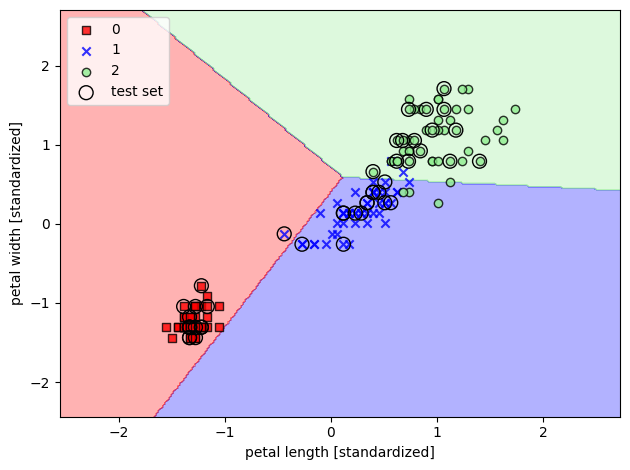

In [101]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 사이킷런 아달린 훈련 (사실 아달린은 아님 ㅎ.)

/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_20507/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_20507/2412832179.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


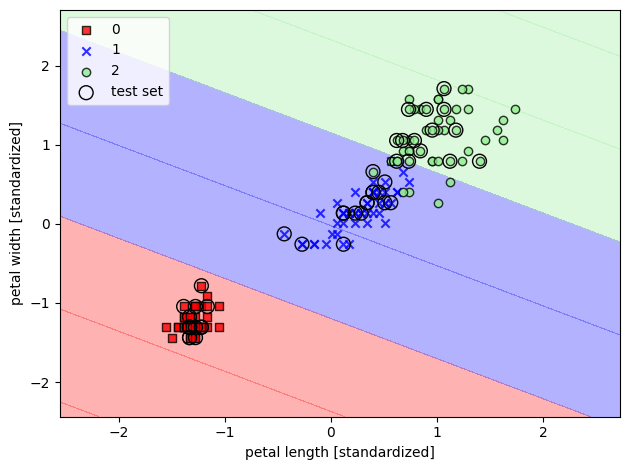

In [102]:
from sklearn.linear_model import SGDRegressor

# 아달린 모델과 유사한 선형 회귀 모델
adl = SGDRegressor(loss='squared_error', learning_rate='constant', eta0=0.01)

adl.fit(X_train, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=adl, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 사이킷런 로지스틱 회귀 알고리즘

/Users/yujin/anaconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_20507/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_20507/2412832179.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


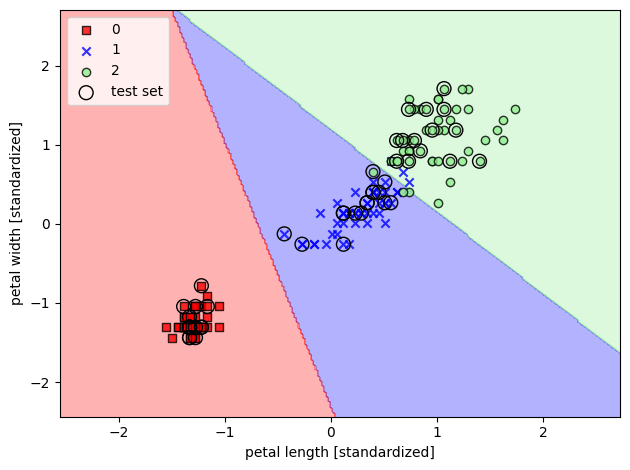

In [110]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

참고로 위는 데이터가 표준화 전처리된 모델이기 때문에 임의의 값을 넣어보고 결과를 보고싶다면, 그 값에 대해서 똑같이 표준화를 해줘야한다.

In [104]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [114]:
x_to_predict  = [[3, 2]]
std_x_to_predict = sc.transform(x_to_predict)
predict = lr.predict(std_x_to_predict)
print(predict)

[1]


## SVM (suport vector machine)

## 사이킷런 SVM 코드

/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_20507/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/6q/q927ypwn4ll9d4rvjq9gl1qw0000gn/T/ipykernel_20507/2412832179.py:42: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


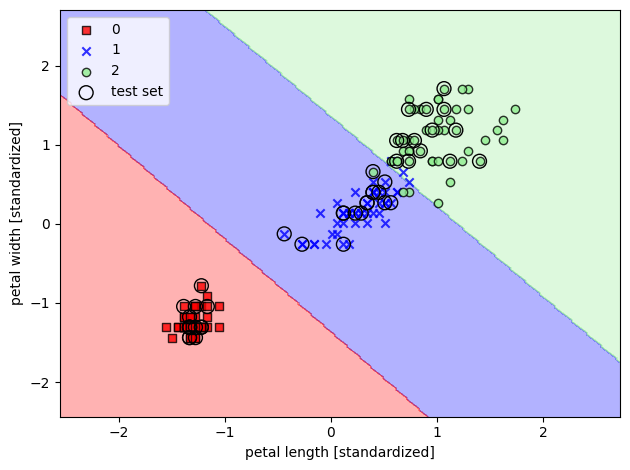

In [106]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()

In [107]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')